In [260]:
##Estimación de datos de finanzas públicas
#Se borra todo lo que se encuentra en el entorno

rm(list=ls())

# Librerías ====
if(!require('pacman')) install.packages('pacman')
pacman::p_load(tidyverse,lubridate, showtext,srvyr,foreign,httr,jsonlite)
font_add_google("Poppins", "pop")
showtext_auto()
remotes::install_github("cpyp-ipdp/funcionespgd", force = TRUE)
library(funcionespgd)

Using GitHub PAT from the git credential store.




rlang (1.1.4 -> 1.1.6) [CRAN]
glue  (1.7.0 -> 1.8.0) [CRAN]
cli   (3.6.3 -> 3.6.5) [CRAN]


Installing 3 packages: rlang, glue, cli

Installing packages into 'C:/Users/claud/AppData/Local/R/win-library/4.4'
(as 'lib' is unspecified)



package 'rlang' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rlang'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\rlang\libs\x64\rlang.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\rlang\libs\x64\rlang.dll: Permission denied"
Warning message:
"restored 'rlang'"


package 'glue' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'glue'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\glue\libs\x64\glue.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\glue\libs\x64\glue.dll: Permission denied"
Warning message:
"restored 'glue'"


package 'cli' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'cli'"
Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"problema al copiar C:\Users\claud\AppData\Local\R\win-library\4.4\00LOCK\cli\libs\x64\cli.dll  a C:\Users\claud\AppData\Local\R\win-library\4.4\cli\libs\x64\cli.dll: Permission denied"
Warning message:
"restored 'cli'"



The downloaded binary packages are in
	C:\Users\claud\AppData\Local\Temp\RtmpkrE6FR\downloaded_packages
── R CMD build ─────────────────────────────────────────────────────────────────
* checking for file 'C:\Users\claud\AppData\Local\Temp\RtmpkrE6FR\remotes65e0795da8d\cpyp-ipdp-funcionespgd-8b2a39e/DESCRIPTION' ... OK
* preparing 'funcionespgd':
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
Omitted 'LazyData' from DESCRIPTION
* building 'funcionespgd_0.1.0.tar.gz'



Warning message:
"package 'funcionespgd' is in use and will not be installed"


In [261]:
ingresos<-read.csv("https://datos.cdmx.gob.mx/dataset/f04b7092-782d-4206-9590-ac8b577891dc/resource/77c2e268-f5b4-4cdf-a705-13a73a9608b3/download/ingresos_2024_01.csv")%>%
filter(periodo=="Cuenta Pública")%>%
#filter(desc_tipo_recurso_clase!="Endeudamiento")%>%
group_by(ciclo)%>%
summarise(ingresos=sum(monto_recaudado))%>%
bind_rows(tibble(ciclo = 2024, ingresos = 267965350437)) %>%

#Transformar a millones de pesos
mutate(ingresos=round(ingresos/1000000,2))%>%
rename(year=ciclo)%>%
#añadir year 2025 267811.2, 2026 271875.9
bind_rows(tibble(year = 2025, ingresos = 267811.2),
          tibble(year = 2026, ingresos = 271875.9),
          tibble(year = 2027, ingresos = 276776.5),
            tibble(year = 2028, ingresos = 280238.5),
            tibble(year = 2029, ingresos = 284262.3),
            tibble(year = 2030, ingresos = 287679.4),
          
          )%>%
          #Calcular variación porcentual respecto al ciclo anterior
mutate(variacion_ing=round((ingresos-lag(ingresos))/lag(ingresos)*100,2))
ingresos

year,ingresos,variacion_ing
<dbl>,<dbl>,<dbl>
2018,240700.2,NA
2019,249012.7,3.45
2020,235527.9,-5.42
2021,236741.7,0.52
2022,271888.2,14.85
2023,298288.0,9.71
2024,267965.3,-10.17
2025,267811.2,-0.06
2026,271875.9,1.52


In [262]:
ingresos_2025 <- ingresos %>% filter(year == 2025) %>% pull(ingresos)
ingresos_2030 <- ingresos %>% filter(year == 2030) %>% pull(ingresos)
años <- 2030 - 2025

# Tasa promedio anual compuesta (en %)
tcp <- ( (ingresos_2030 / ingresos_2025)^(1 / años) - 1 ) * 100
tcp

[1] 1.44158

In [263]:
tasas <- seq(tcp, 1, length.out = 15)  # del 1.5% en 2031 al 1.0% en 2045

ingreso_2030 <- ingresos %>% filter(year == 2030) %>% pull(ingresos)

ingresos_futuros <- data.frame(
  year = 2031:2045,
  ingresos = Reduce(function(prev, tasa) prev * (1 + tasa / 100), tasas, init = ingreso_2030, accumulate = TRUE)[-1]
)

ingresos_futuros

year,ingresos
<int>,<dbl>
2031,291826.5
2032,295941.4
2033,300020.9
2034,304062.1
2035,308061.8
2036,312016.9
2037,315924.4
2038,319781.1
2039,323584.1


In [264]:
#Pegar ingresos e ingresos futuros
futuros <- ingresos %>%
  select(year, ingresos) %>%
  bind_rows(ingresos_futuros)
futuros

year,ingresos
<dbl>,<dbl>
2018,240700.2
2019,249012.7
2020,235527.9
2021,236741.7
2022,271888.2
2023,298288.0
2024,267965.3
2025,267811.2
2026,271875.9


In [265]:
escenarios<-futuros%>%
mutate(ingresos=ingresos/1000)%>%
intervals("ingresos", margen = 0.001, año_base = 2023)

escenarios

year,estimado,superior,inferior
<dbl>,<dbl>,<dbl>,<dbl>
2018,240.7002,240.7002,240.7002
2019,249.0127,249.0127,249.0127
2020,235.5279,235.5279,235.5279
2021,236.7417,236.7417,236.7417
2022,271.8882,271.8882,271.8882
2023,298.2880,298.2880,298.2880
2024,267.9654,268.2333,267.6977
2025,267.8112,268.3471,267.2764
2026,271.8759,272.6923,271.0619


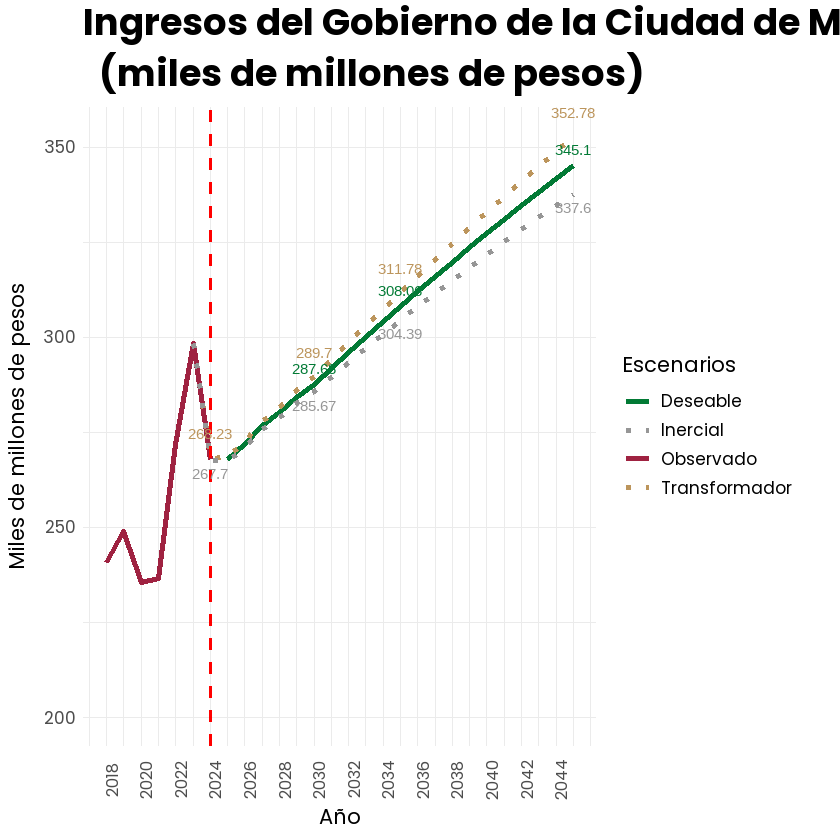

In [266]:
grafica_bonita(
  data = escenarios,
  x = "year",
  y = "estimado",
  titulo = "Ingresos del Gobierno de la Ciudad de México
  (miles de millones de pesos)",
  linea_vertical = 2024,
  mostrar_intervalo = "ambos",
  nombre_observado = "Observado",
  nombre_estimado_futuro = "Deseable",
  nombre_intervalo_superior = "Transformador",
  nombre_intervalo_inferior = "Inercial",
  mostrar_leyenda = TRUE,
  fuente = "pop",
  etiqueta_x = "Año",
  etiqueta_y = "Miles de millones de pesos",
  titulo_leyenda = "Escenarios",
  limite_inferior_y = 200
)

ggsave("finanzas/ingresos.png", width = 12, height = 10, dpi = 100, bg = "white")